<a href="https://www.kaggle.com/code/gpreda/story-of-hexi-pharma?scriptVersionId=126491758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center><h1>Story of Hexi Pharma</h1></center>
<br>
<center><img src="https://www.romaniajournal.ro/wp-content/uploads/2017/03/61800365-e1488835287550.png" width="500"></center>
<br>

# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Data about Hexi Pharma</a>   
- <a href='#4'>Conclusions</a>

# <a id='1'> Introduction</a>


From the dataset with [Romanian public tenders data between 2007 and 2016](https://www.kaggle.com/datasets/gpreda/public-tenders-romania-20072016), we will select the **Hexi Pharma** data, to follow this company evolution in time.

Following [Collective nightclub case](https://en.wikipedia.org/wiki/Colectiv_nightclub_fire) and subsequent [nosocomial infections](https://en.wikipedia.org/wiki/Diluted_disinfectants_crisis_(Romania)) of the victims in Romanian hospitals due to diluted disinfectants distributed by the company for several years, Hexi Pharma came to the public's attention.  

The immediate impact of Hexi Pharma business conduct was on the main hospitals from Capital city [Bucharest](https://en.wikipedia.org/wiki/Bucharest). Several of the survivors from Colectiv nightclub fire admitted to Bucharest's hospitals were reported with nosocomial infections. It is clear now that due to these nosocomial infections, at least three (but probably much more of them) died. 

Starting from this, the public realised that Hexi Pharma had sold diluted disinfectants and other under-standard medical supplies to hospitals in all parts of the country.  Consequently their actions would have most probably caused in time another hundreds or maybe up to tens of thousands of deaths due to supra-infections of patients of hospitals around the country.

Only after the nosocomial infections of patients from Colectiv nightclub fire the larger public in Romania understood the dimmension of this phenomena: nosocomial infections in hospitals. In parallel, the public understood also that the phenomena was hidden from the public by systematic under-reporting by hospital authorities.

Now I will analyze in detail the contracts of Hexi Pharma with the various public hospitals around the country, to assess the dimmension of their impact on public health and patients wellbeing for the entire period when they were in business (and for which we have data, i.e. from 2007 to 2016).



In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings 
warnings.simplefilter("ignore")

In [2]:
data_df = pd.read_csv("/kaggle/input/public-tenders-romania-20072016/contracts.csv", low_memory=False)

# <a id='2'>Data about Hexi Pharma</a>

Let's select the data about Hexi Pharma. We will select the entries in the dataset where the company name is **Hexi Pharma** or variants.  

This is because the company might have been registered under alternate names when filling for public contracts as well as having misspell their company name.

In [3]:
pattern = re.compile(r'^HEXI')
company_list = list(data_df.Winner.unique())
matches = [x for x in company_list if pattern.match(x)]
print(f"Matching Winner names: {matches}")

Matching Winner names: ['HEXI FARMA S.R.L.', 'HEXI PHARMA CO S.R.L.', 'HEXI PHARMA', 'HEXI PHARMA CO SRL', 'HEXI PHARMA CO']


We include all the matching options in the filter. 

Let's look to some of the data distributions:
* the name used by Hexi Pharma in various bids;  
* the award type;  
* contract type;  
* procedure type;  

We then can look to the most frequent clients of Hexi Pharma as following:
* contracting authority name;  
* contracting authority type;  


In [4]:
hexi_df = data_df.loc[data_df.Winner.isin(matches)]
print(f"Hexi Pharma appears for {hexi_df.shape[0]} times in the data.")

Hexi Pharma appears for 826 times in the data.


In [5]:
def plot_count(feature, title, df, size=1, rotation=False, order=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if order:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:31], palette='Set3')
    else:
        g = sns.countplot(df[feature],  palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if rotation:
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 0.2,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

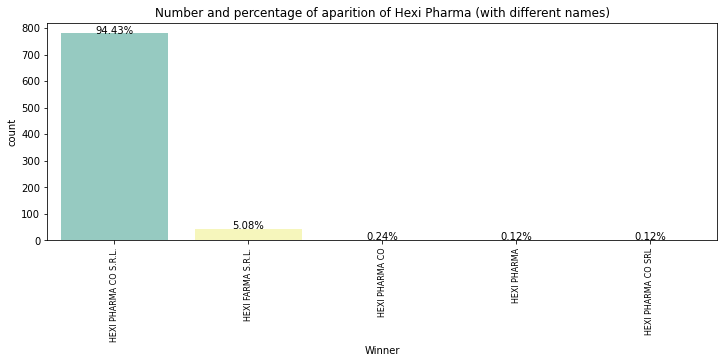

In [6]:
plot_count("Winner", "aparition of Hexi Pharma (with different names)", hexi_df, size=3, rotation=True)

The company appears with 5 different names (incomplete or wrongly spelled name).

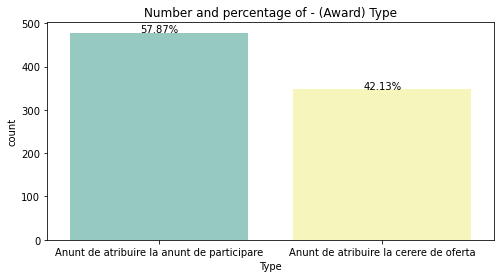

In [7]:
plot_count("Type", "- (Award) Type", hexi_df, size=2)

Hexi Pharma won two types of contracts awards:
* Award notice to the participation notice;  
* Award notice at the offer request.

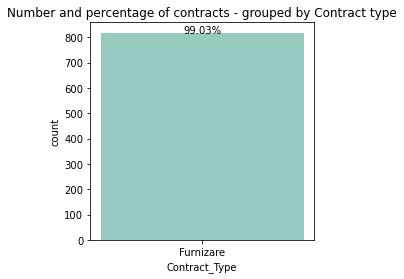

In [8]:
plot_count("Contract_Type", "contracts - grouped by Contract type", hexi_df, size=1)

All contracts for Hexi Pharma were supply contracts.

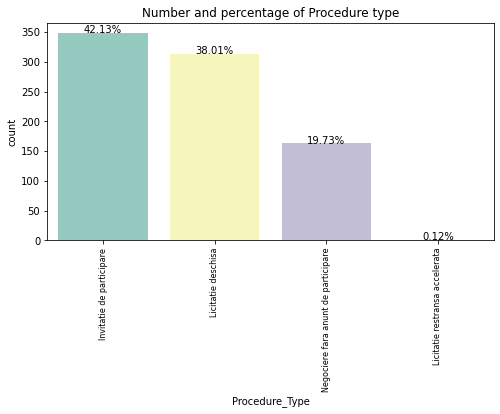

In [9]:
plot_count("Procedure_Type", "Procedure type", hexi_df, size=2, rotation=True)

Most of the awarder contracts followed an invitation to take part to the competition (42%), followed by open auction (38%) and Negotiation for participation notice (19%). 

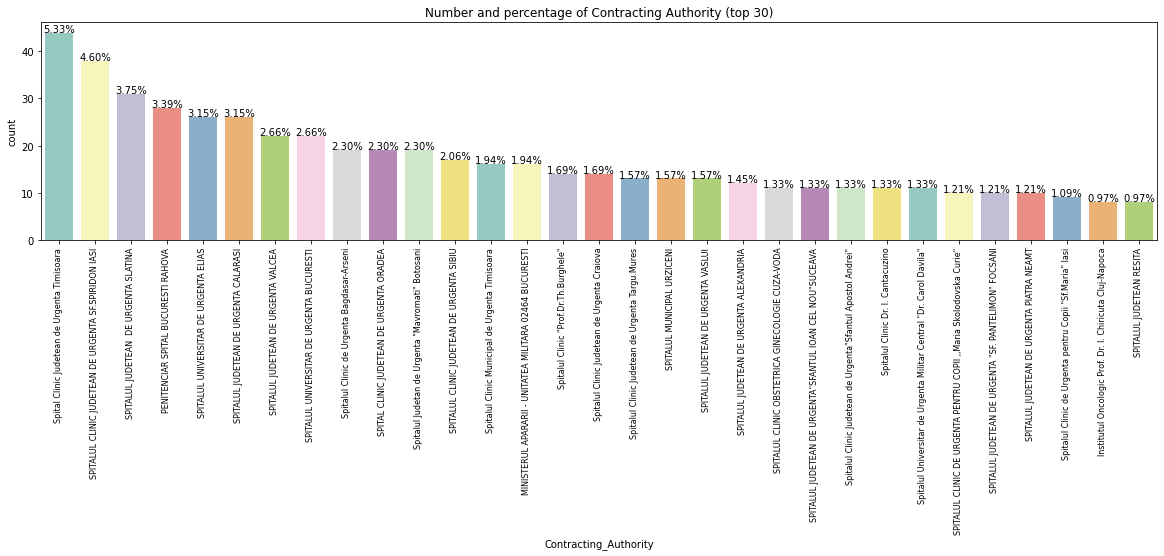

In [10]:
plot_count("Contracting_Authority", "Contracting Authority (top 30)", hexi_df, size=5, rotation=True)

We observe that the contracting authorities are directly hospitals.  On 4th place is the hospital for a penitentiary (Rahova, near Bucharest). In top 10 we see some of the largest hospitals in Bucharest, as number of contracts.

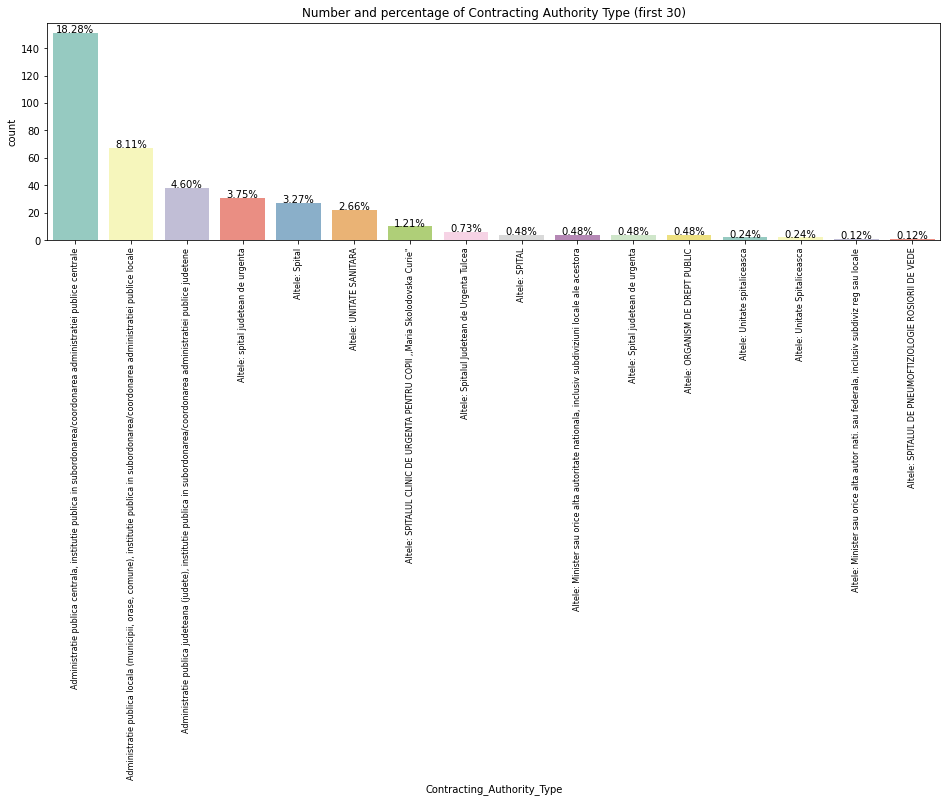

In [11]:
plot_count("Contracting_Authority_Type", "Contracting Authority Type (first 30)", hexi_df, size=4, rotation=True)

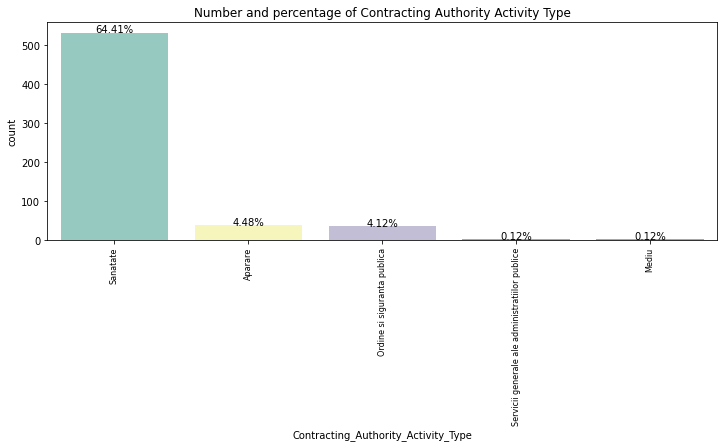

In [12]:
plot_count("Contracting_Authority_Activity_Type", "Contracting Authority Activity Type", hexi_df, size=3, rotation=True)

As we expected, almost 2/3 of the contracts were in Health, but an aditional ~8% are with Defense and Interior Ministry.

We also observe that not all the data has this field filled, since the total of calculated percents is less than 80%.

In [13]:

hexi_df["Award_Announcement_Date"] = hexi_df["Award_Announcement_Date"].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))
hexi_df["Award_Announcement_Year"] = hexi_df["Award_Announcement_Date"].dt.year
hexi_df["Award_Announcement_Month"] = hexi_df["Award_Announcement_Date"].dt.month

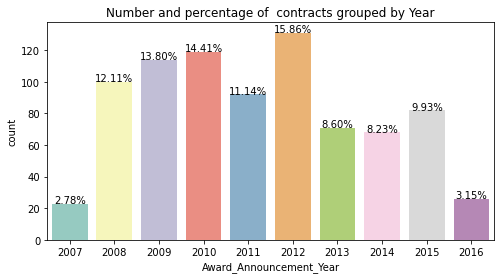

In [14]:
plot_count("Award_Announcement_Year", " contracts grouped by Year", hexi_df, size=2, order=False)

We observe that the best years in terms of number of contracts were 2012, followed by 2010 and 2009.

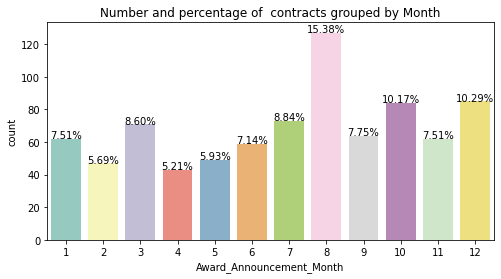

In [15]:
plot_count("Award_Announcement_Month", " contracts grouped by Month", hexi_df, size=2, order=False)

Most of the contracts for Hexi Pharma were closed on August.

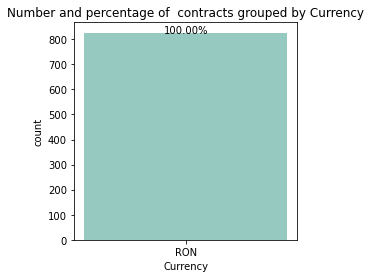

In [16]:
plot_count("Currency", " contracts grouped by Currency", hexi_df, size=1)

All contracts were in the Romanian currency RON.

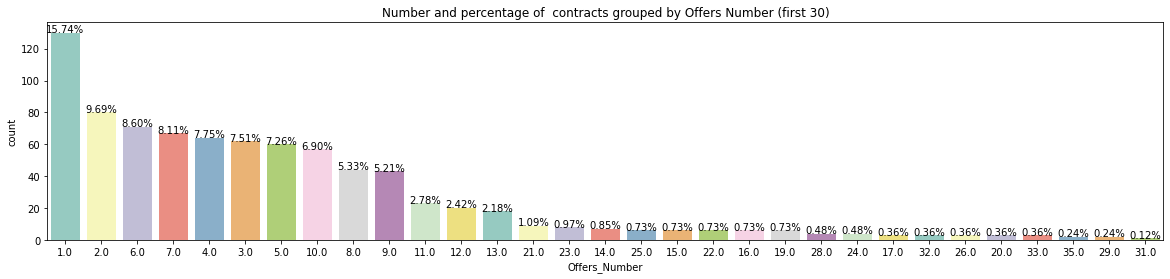

In [17]:
plot_count("Offers_Number", " contracts grouped by Offers Number (first 30)", hexi_df, size=5)

A large percent (15%) or a number of over 120 contracts for Hexi Pharma were won when the company was the only participant.

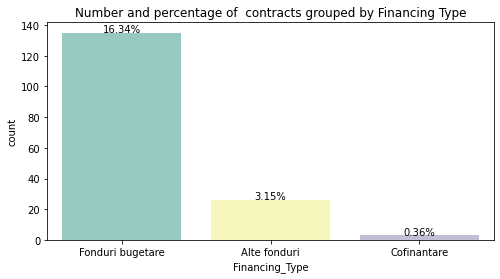

In [18]:
plot_count("Financing_Type", " contracts grouped by Financing Type", hexi_df, size=2)

Majority of the financing type of contracts are from `budget funds`, followed by `other funds` and `cofunding`. we observe that actually only a part of the bids have this field completed.

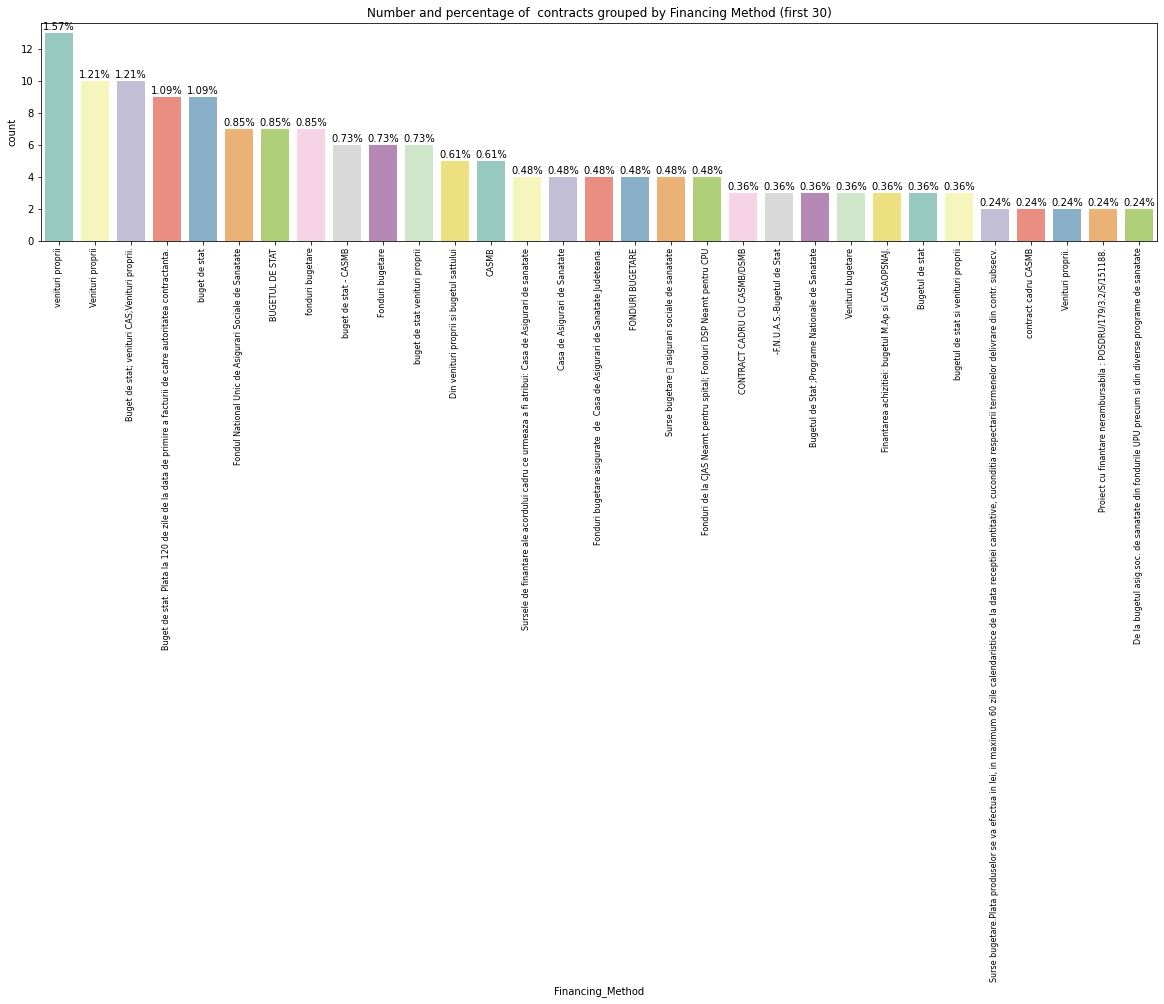

In [19]:
plot_count("Financing_Method", " contracts grouped by Financing Method (first 30)", hexi_df, size=5, rotation=True)

Here we observe that the Financial method should have been cleaned, because there are multiple different writings for the same value, for example for "Own funds" are at least 5 different writings.

Let's look to the titles of the contracts.

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

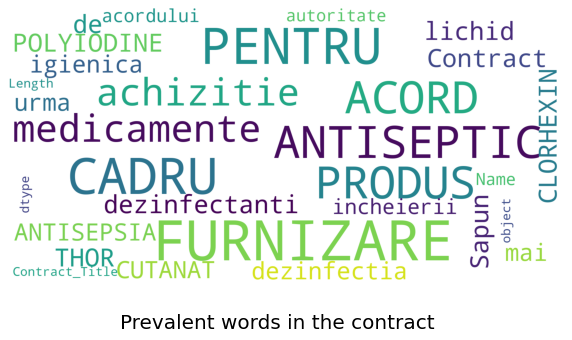

In [21]:
show_wordcloud(hexi_df["Contract_Title"], "Prevalent words in the contract")

We see that, besides frequent words for Romanian language specific to such contracts (Acord="accord", Pentru="for", Cadru="Frame") we see the words specific to Hexi Pharma contracts:
* Antiseptic  
* Dezinfectia (disinfection)
* Cutanat (Cutaneous)
* Polyiodine (Name of a disinfection substance)
* Sapun  (Soap)
* Clorhexin  (Name of a disinfection substance)
* Lichid  (Liquid)
* Igienica (Hygienic)
* Medicamente  (Medicaments)

Hexi Pharma had mostly contracts with hospitals for disinfectants.

Let's see with what hospitals Hexi Pharma had the largest contracts in terms of value.

In [22]:
hexi_df[["Contracting_Authority", "Award_Announcement_Year", "Value"]].sort_values(by=["Value"], ascending=False).head(10)

,Contracting_Authority,Award_Announcement_Year,Value
822988,SPITAL CLINIC JUDETEAN DE URGENTA ORADEA,2015,28033178.85
714095,Spitalul Clinic Judetean de Urgenta Craiova,2014,8860512.00
846315,Spitalul Clinic Judetean de Urgenta Targu.Mures,2015,4460364.00
464497,Spitalul Clinic Judetean de Urgenta Craiova,2011,3334220.00
579965,SPITAL CLINIC JUDETEAN DE URGENTA ORADEA,2012,3278616.32
751128,SPITALUL JUDETEAN DE URGENTA BRAILA,2014,2974104.00
844764,SPITALUL UNIVERSITAR DE URGENTA BUCURESTI,2015,2948076.00
644234,Spitalul Clinic de Urgenta Bagdasar-Arseni,2013,1994240.00
751127,"Spitalul Judetan de Urgenta ""Mavromati"" Botosani",2014,1801968.00
644235,Spitalul Clinic de Urgenta Bagdasar-Arseni,2013,1642240.00


Hospitals in Oradea and Craiova, as well as Bagdasar-Arseni in Bucharest appears twice in the top 10, with the Hospital from Oradea on 1st place, woth an amount of 28 Million RON (more than 3 times more than the next contract, of 8.8 Million, with Hospital from Craiova).  
Let's see the details for the 1st hospital.

In [23]:
hexi_df.loc[(hexi_df.Contracting_Authority=="SPITAL CLINIC JUDETEAN DE URGENTA ORADEA")&(hexi_df.Award_Announcement_Year==2015)][["Contract_Title", "Procedure_Type", "Value", "Award_Announcement_Month"]]

,Contract_Title,Procedure_Type,Value,Award_Announcement_Month
788940,DEZINFECTANTI,Licitatie deschisa,876708.00,6
788959,DEZINFECTANTI,Negociere fara anunt de participare,16800.00,1
788960,DEZINFECTANT DE NIVEL MEDIU PT.INSTRUMENTAR,Negociere fara anunt de participare,25200.00,4
822988,Medicamente,Licitatie deschisa,28033178.85,9


With the hospital from Oradea, Hexi Pharma won in September 2015 an open auction for 28 Million RON. This is the largest contract won by Hexi Pharma, 1 month before the fire broke at Colectiv nightclub.

Let's see what are the most frequent contracts titles for Hexi Pharma.

In [24]:
hexi_df[["Contract_Title"]].value_counts()[:10]

Contract_Title                     
DEZINFECTANTI                          30
Dezinfectanti                          27
achizitie dezinfectanti                27
ACORD CADRU FURNIZARE DEZINFECTANTI    23
FURNIZARE DEZINFECTANTI                22
Furnizare medicamente                  19
dezinfectanti                          17
medicamente                            13
Furnizare dezinfectanti                12
achizitie medicamente                  12
dtype: int64

The most frequent contract name is `disinfectants` - appears 7 times in top 10, with different writings, followed by `medicines` - appears the rest of 3.

Let's aggregate the data per year.

In [25]:
agg_data = hexi_df.groupby(["Winner", "Winner_Country", "Award_Announcement_Year", "Contracting_Authority", "Contracting_Authority_Activity_Type"])["Value_RON"].agg(["sum", "count"])

In [26]:
agg_data_df = pd.DataFrame(agg_data).reset_index()
agg_data_df.columns = ["Winner", "Winner Country", "Year", "Contracting Authority","Activity Type", "Total", "Count"]

Let's look to top years for the Hexi Pharma companies in terms of total amount.

In [27]:
agg_data_df.sort_values(by=["Total"], ascending=False).head(10)

,Winner,Winner Country,Year,Contracting Authority,Activity Type,Total,Count
228,HEXI PHARMA CO S.R.L.,Romania,2015,SPITAL CLINIC JUDETEAN DE URGENTA ORADEA,Sanatate,28951886.85,4
219,HEXI PHARMA CO S.R.L.,Romania,2014,Spitalul Clinic Judetean de Urgenta Craiova,Sanatate,8860512.00,1
201,HEXI PHARMA CO S.R.L.,Romania,2013,Spitalul Clinic de Urgenta Bagdasar-Arseni,Sanatate,5228096.00,6
150,HEXI PHARMA CO S.R.L.,Romania,2011,Spitalul Clinic Judetean de Urgenta Craiova,Sanatate,4925760.00,3
245,HEXI PHARMA CO S.R.L.,Romania,2015,Spitalul Clinic Judetean de Urgenta Targu.Mures,Sanatate,4460364.00,1
160,HEXI PHARMA CO S.R.L.,Romania,2012,SPITAL CLINIC JUDETEAN DE URGENTA ORADEA,Sanatate,3302506.32,3
243,HEXI PHARMA CO S.R.L.,Romania,2015,SPITALUL UNIVERSITAR DE URGENTA BUCURESTI,Sanatate,3165163.50,8
211,HEXI PHARMA CO S.R.L.,Romania,2014,SPITALUL JUDETEAN DE URGENTA BRAILA,Sanatate,2974104.00,1
151,HEXI PHARMA CO S.R.L.,Romania,2011,Spitalul Clinic Judetean de Urgenta Targu.Mures,Sanatate,2473990.00,4
171,HEXI PHARMA CO S.R.L.,Romania,2012,SPITALUL JUDETEAN DE URGENTA VASLUI,Sanatate,2148000.00,4


The top 10 is dominated by contracts in Health. A number of 7 contracts with Defense Ministry in 2012 brought this contractor/year on 10th position. 

Let's also look to the top 10 in terms of number of contracts.

In [28]:
agg_data_df.sort_values(by=["Count"], ascending=False).head(10)

,Winner,Winner Country,Year,Contracting Authority,Activity Type,Total,Count
148,HEXI PHARMA CO S.R.L.,Romania,2011,Spital Clinic Judetean de Urgenta Timisoara,Sanatate,90595.0,15
185,HEXI PHARMA CO S.R.L.,Romania,2013,MINISTERUL APARARII - UNITATEA MILITARA 02464 ...,Aparare,468702.5,12
168,HEXI PHARMA CO S.R.L.,Romania,2012,SPITALUL JUDETEAN DE URGENTA CALARASI,Sanatate,613422.0,10
163,HEXI PHARMA CO S.R.L.,Romania,2012,SPITALUL CLINIC JUDETEAN DE URGENTA SF.SPIRIDO...,Sanatate,578532.0,10
98,HEXI PHARMA CO S.R.L.,Romania,2009,"Spitalul Judetan de Urgenta ""Mavromati"" Botosani",Sanatate,276616.5,10
103,HEXI PHARMA CO S.R.L.,Romania,2010,PENITENCIAR SPITAL BUCURESTI RAHOVA,Ordine si siguranta publica,70783.2,9
111,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL JUDETEAN DE URGENTA SLATINA,Sanatate,1174625.0,9
82,HEXI PHARMA CO S.R.L.,Romania,2009,SPITALUL JUDETEAN DE URGENTA SLATINA,Sanatate,765720.0,9
236,HEXI PHARMA CO S.R.L.,Romania,2015,SPITALUL JUDETEAN DE URGENTA CALARASI,Sanatate,497710.0,9
135,HEXI PHARMA CO S.R.L.,Romania,2011,SPITALUL CLINIC JUDETEAN DE URGENTA SF.SPIRIDO...,Sanatate,382645.2,8


In [29]:
import plotly.express as px
fig = px.scatter(agg_data_df, x='Total', y='Count', color='Contracting Authority', size='Total', size_max = 50,
                hover_name='Contracting Authority', animation_frame='Year',
                 title="Winner contract numbers vs. total amount grouped by Activity Type, per year",
                 animation_group='Activity Type', range_x=[-2000, 30000000], range_y=[-1, 16],
                width=800, height=800)
fig.update_layout(legend=dict(orientation="h",  yanchor="bottom", y=-1, xanchor="right", x=1, font=dict(family="Courier", size=12,color="black")))
fig.show()



### Total amount and number of contracts aggregated per year and activity type


Let's look now to the aggregated totals and number of contracts per year and activity type.

In [30]:
agg2_data = hexi_df.groupby(["Award_Announcement_Year", "Contracting_Authority_Activity_Type"])["Value_RON"].agg(["sum", "count"])

In [31]:
agg2_data_df = pd.DataFrame(agg2_data).reset_index()
agg2_data_df.columns = ["Year", "Activity Type", "Total", "Count"]
agg2_data_df.head()

,Year,Activity Type,Total,Count
0,2007,Sanatate,594119.64,15
1,2008,Aparare,158705.25,5
2,2008,Ordine si siguranta publica,26930.00,1
3,2008,Sanatate,3781894.16,69
4,2009,Aparare,286790.00,4


Let's look to the total amount per activity type.

In [32]:
df2 = agg2_data_df[["Year", "Activity Type", "Total"]].pivot_table(index=['Year'], columns=['Activity Type'])
df2

Total                                                    \
Activity Type     Aparare    Mediu Ordine si siguranta publica     Sanatate   
Year                                                                          
2007                  NaN      NaN                         NaN    594119.64   
2008            158705.25      NaN                     26930.0   3781894.16   
2009            286790.00  33320.0                      6050.0   3307019.10   
2010             10800.00      NaN                     70783.2   6825728.40   
2011                  NaN      NaN                      3200.0  11058360.00   
2012           1718941.00      NaN                     41031.0  10485478.92   
2013            468702.50      NaN                    252866.5  10171292.00   
2014            104470.00      NaN                         NaN  17370452.00   
2015            170400.00      NaN                    193454.0  45253215.81   
2016            143554.00      NaN                         NaN   4747909.00   

                                                              
Activity Type Servicii generale ale administratiilor publice  
Year                                                          
2007                                                     NaN  
2008                                                     NaN  
2009                                                359900.0  
2010                                                     NaN  
2011                                                     NaN  
2012                                                     NaN  
2013                                                     NaN  
2014                                                     NaN  
2015                                                     NaN  
2016                                                     NaN

Let's also look to the total count per activity type.

In [33]:
df3 = agg2_data_df[["Year", "Activity Type", "Count"]].pivot_table(index=['Year'], columns=['Activity Type'])
df3

Count                                             \
Activity Type Aparare Mediu Ordine si siguranta publica Sanatate   
Year                                                               
2007              NaN   NaN                         NaN     15.0   
2008              5.0   NaN                         1.0     69.0   
2009              4.0   1.0                         2.0     61.0   
2010              1.0   NaN                         9.0     82.0   
2011              NaN   NaN                         2.0     77.0   
2012              7.0   NaN                         7.0     77.0   
2013             12.0   NaN                         5.0     40.0   
2014              2.0   NaN                         NaN     42.0   
2015              2.0   NaN                         8.0     57.0   
2016              4.0   NaN                         NaN     12.0   

                                                              
Activity Type Servicii generale ale administratiilor publice  
Year                                                          
2007                                                     NaN  
2008                                                     NaN  
2009                                                     1.0  
2010                                                     NaN  
2011                                                     NaN  
2012                                                     NaN  
2013                                                     NaN  
2014                                                     NaN  
2015                                                     NaN  
2016                                                     NaN

Let's inspect now the top 10 of total amounts, for any year.

In [34]:
agg2_data_df.sort_values(by=["Total"], ascending=False).head(10)

,Year,Activity Type,Total,Count
24,2015,Sanatate,45253215.81,57
21,2014,Sanatate,17370452.00,42
13,2011,Sanatate,11058360.00,77
16,2012,Sanatate,10485478.92,77
19,2013,Sanatate,10171292.00,40
11,2010,Sanatate,6825728.40,82
26,2016,Sanatate,4747909.00,12
3,2008,Sanatate,3781894.16,69
7,2009,Sanatate,3307019.10,61
14,2012,Aparare,1718941.00,7


The year when Hexi Pharma business thrieved is the year of Colective nightclub fire, 2015. In that year, Hexi Pharma's sales skyroketed, from the 17 Million previous year to 45 Million.

In [35]:
agg2_data_df.sort_values(by=["Count"], ascending=False).head(10)

,Year,Activity Type,Total,Count
11,2010,Sanatate,6825728.40,82
13,2011,Sanatate,11058360.00,77
16,2012,Sanatate,10485478.92,77
3,2008,Sanatate,3781894.16,69
7,2009,Sanatate,3307019.10,61
24,2015,Sanatate,45253215.81,57
21,2014,Sanatate,17370452.00,42
19,2013,Sanatate,10171292.00,40
0,2007,Sanatate,594119.64,15
26,2016,Sanatate,4747909.00,12


As number of contracts, although the total amount was not very high, the best year in 2010, with a total of 82 wins for health, followed by 2011 an 2012, each with 77 wins, also with Health.

Let's glimpse the wins of Hexi Pharma in 2010.

In [36]:
agg_data_df.loc[agg_data_df.Year==2010].sort_values(by=["Count"], ascending=False).head(10)

,Winner,Winner Country,Year,Contracting Authority,Activity Type,Total,Count
111,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL JUDETEAN DE URGENTA SLATINA,Sanatate,1174625.0,9
103,HEXI PHARMA CO S.R.L.,Romania,2010,PENITENCIAR SPITAL BUCURESTI RAHOVA,Ordine si siguranta publica,70783.2,9
120,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL UNIVERSITAR DE URGENTA ELIAS,Sanatate,503745.0,8
125,HEXI PHARMA CO S.R.L.,Romania,2010,"Spitalul Judetan de Urgenta ""Mavromati"" Botosani",Sanatate,534900.0,6
121,HEXI PHARMA CO S.R.L.,Romania,2010,Spital Clinic Judetean de Urgenta Timisoara,Sanatate,58504.0,6
128,HEXI PHARMA CO S.R.L.,Romania,2010,Spitalul Municipal Dimitrie Castroian Husi,Sanatate,226887.5,5
114,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL JUDETEAN DE URGENTA VALCEA,Sanatate,146711.0,5
126,HEXI PHARMA CO S.R.L.,Romania,2010,Spitalul Judetean de Urgenta Slobozia,Sanatate,43818.0,4
9,HEXI FARMA S.R.L.,Romania,2010,SPITALUL CLINIC JUDETEAN DE URGENTA SIBIU,Sanatate,86160.0,4
11,HEXI FARMA S.R.L.,Romania,2010,Spital Clinic Judetean de Urgenta Timisoara,Sanatate,43269.0,4


The top of 2010 in terms of number of contracts is dominated by Slatina Hospital and the hospital of Rahova penitentiary, each with 9 contracts that year.

In [37]:
agg_data_df.loc[agg_data_df.Year==2010].sort_values(by=["Total"], ascending=False).head(10)

,Winner,Winner Country,Year,Contracting Authority,Activity Type,Total,Count
110,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL CLINIC JUDETEAN MURES,Sanatate,1219834.3,2
111,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL JUDETEAN DE URGENTA SLATINA,Sanatate,1174625.0,9
123,HEXI PHARMA CO S.R.L.,Romania,2010,Spitalul Clinic Judetean de Urgenta Craiova,Sanatate,966090.0,2
125,HEXI PHARMA CO S.R.L.,Romania,2010,"Spitalul Judetan de Urgenta ""Mavromati"" Botosani",Sanatate,534900.0,6
120,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL UNIVERSITAR DE URGENTA ELIAS,Sanatate,503745.0,8
113,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL JUDETEAN DE URGENTA CALARASI,Sanatate,415060.0,1
109,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL CLINIC JUDETEAN DE URGENTA SIBIU,Sanatate,311688.0,2
128,HEXI PHARMA CO S.R.L.,Romania,2010,Spitalul Municipal Dimitrie Castroian Husi,Sanatate,226887.5,5
112,HEXI PHARMA CO S.R.L.,Romania,2010,SPITALUL JUDETEAN DE URGENTA BRAILA,Sanatate,194472.0,1
122,HEXI PHARMA CO S.R.L.,Romania,2010,"Spitalul Clinic ""Prof.Dr.Th.Burghele""",Sanatate,158799.0,2


In terms of total amount, the top of 2010 is dominated by Mures county hospital and Slatina county hospital, both with over 1 Million contracts, from 2 and 9 contracts respectively.

Slatina hospital, as well as Rahova penitentiary hospitals are also in top 5 overall as number of contracts.

In [38]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [39]:
def plot_time_variation(df, y='Total', hue='Activity Type', size=1, title=""):
    
    data = []
    groups = df[hue].unique()
    
    for group in groups:
        df_ = df[(df[hue]==group)] 
        traceS = go.Bar(
            x = df_['Year'],y = df_[y],
            name=group,
            marker=dict(
                        line=dict(
                            color='black',
                            width=0.75),
                        opacity=0.7,
                    ),
            text=df_[hue],
        )
        data.append(traceS)
    layout = dict(title = title,
              xaxis = dict(title = 'Year', showticklabels=True), 
              yaxis = dict(title = f'{y}'),
              hovermode = 'closest',
              barmode='stack'
             )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='total-count')

In [40]:
plot_time_variation(agg2_data_df, 'Total', 'Activity Type', 4, "Total amount of contracts (2007-2016)")

Best year in terms of total amount of contracts was 2015, where income exceeded 45 Million RON.

In [41]:
plot_time_variation(agg2_data_df, 'Count', 'Activity Type', 4, "Number of contracts (2007-2016)")

The largest number of contracts was awarded to Hexi Pharma in 2010 & 2012.

We can show the same with heatmaps.

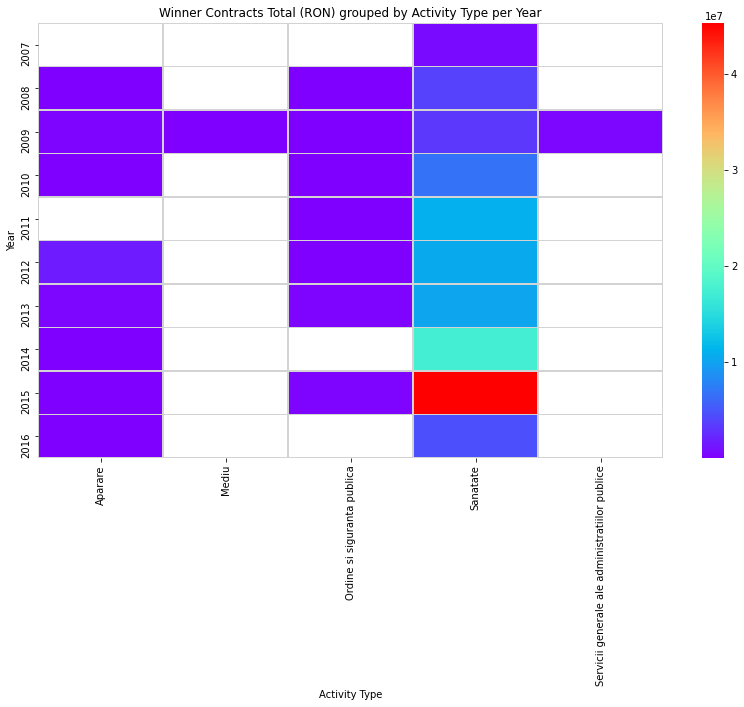

In [42]:
heatmap = agg2_data_df.pivot("Year", "Activity Type", 'Total')
fig, ax = plt.subplots(nrows=1,figsize=(14,8))
sns.heatmap(heatmap, linewidths=.5, cmap='rainbow', linecolor='lightgrey')
plt.title("Winner Contracts Total (RON) grouped by Activity Type per Year")
plt.xticks(rotation=90, size=10)

plt.show()

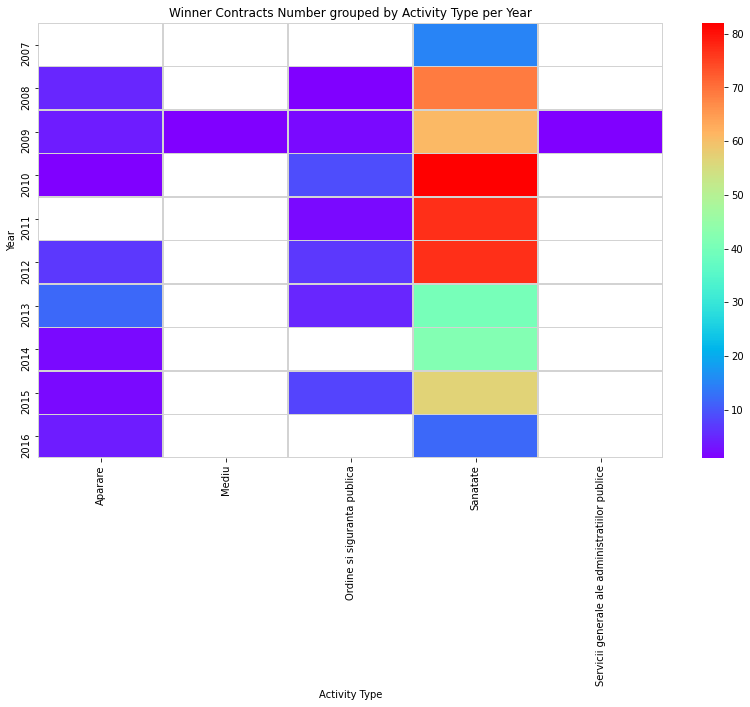

In [43]:
heatmap = agg2_data_df.pivot("Year", "Activity Type", 'Count')
fig, ax = plt.subplots(nrows=1,figsize=(14,8))
sns.heatmap(heatmap, linewidths=.5, cmap='rainbow',linecolor='lightgrey')
plt.title("Winner Contracts Number grouped by Activity Type per Year")
plt.xticks(rotation=90, size=10)

plt.show()

Let's show now an animated plot of yearly evolution of total amounts and number of contracts, gruped by Activity Type.

In [44]:
filtered_agg_data_df = agg2_data_df.loc[agg2_data_df.Total>0]
print(f"Items in filtered data: {filtered_agg_data_df.shape[0]} ({filtered_agg_data_df.shape[1]} columns)")

Items in filtered data: 27 (4 columns)


In [45]:
import plotly.express as px
fig = px.scatter(filtered_agg_data_df, x='Total', y='Count', color='Activity Type', size='Total', size_max = 50,
                hover_name='Activity Type', log_x=False, animation_frame='Year',
                 title="Winner contract numbers vs. total amount grouped by Activity Type, per year",
                 animation_group='Activity Type', range_x=[1, 100000000], range_y=[-1, 100],
                width=800, height=800)
fig.show()

#  <a id='3'>Conclusions</a>

Hexi Pharma activity was mostly about providing disinfectants for hospitals and became infamous after it was found that the company provided low quality (diluted) disinfectants resulting in persistence of nosocomial infections in large hospitals in Romania, after Colectiv nightclub fire in Bucharest in 2015. In the same time, one month before Colectiv, Hexi Pharma won his largest contract with an hospital in Oradea, Romania, 3 times larger than any other contract, to provide medicaments. Next year Hexi Pharma went out of business.

